<a href="https://colab.research.google.com/github/Mufasyah98/Project-2-Data-Science-AirBnB-/blob/main/Project_2_Data_Science_AirBnb_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

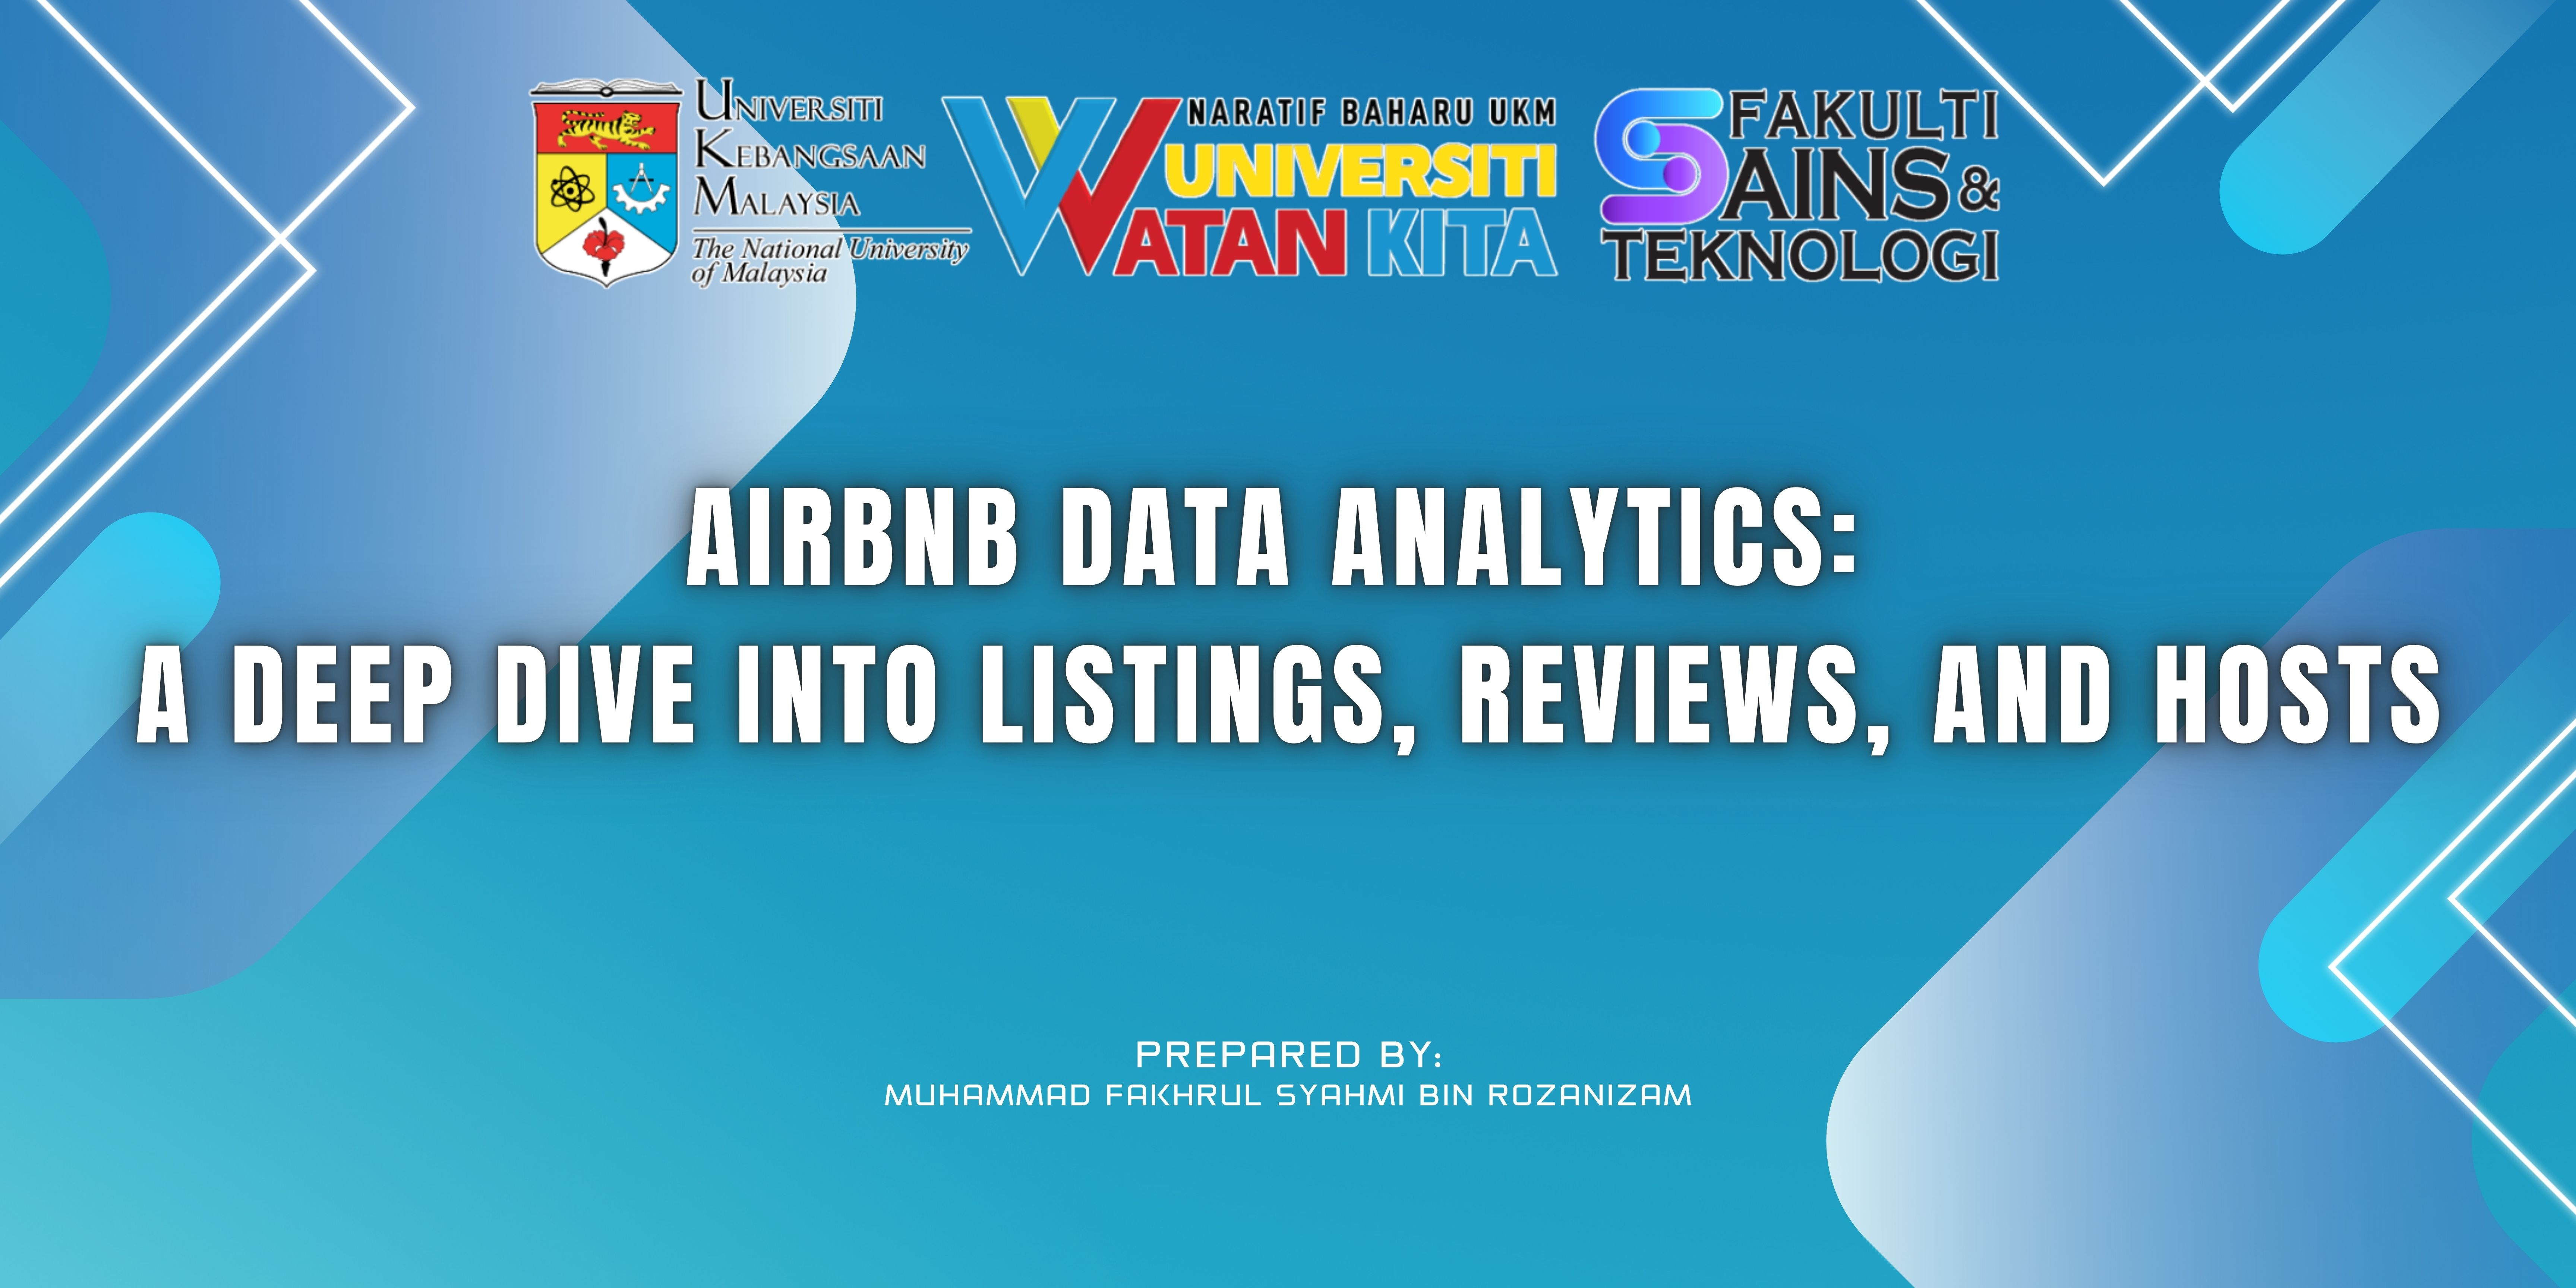

# **Project Data Science For Airbnb Data**

## **Introduction**

The purpose of this analysis is to explore Airbnb listing data to uncover meaningful insights that can help stakeholders optimize their platform's performance. Specifically, the dataset contains details about listings such as review rates, room types, host activity, and neighborhood group distributions. This analysis aims to identify trends, provide actionable insights, and assist in decision-making to enhance customer satisfaction and operational efficiency.


**Link to data sources:**

https://www.kaggle.com/code/ajogipaul/exploratory-data-analysis-of-airbnb-open-data/input

https://drive.google.com/file/d/1sXzRBoDjwi2sayOyK8KgNJrGsI4puybA/view?usp=sharing

## **Problem Statement**
Problem Statement
This analysis addresses the following key questions:



*   What is the average review rate for listings, and how does it vary across neighborhood groups and room types?
*   Which hosts have the most listings, and what does the distribution look like?
*   What is the distribution of listings by room type, and how do room types contribute to Airbnb's offerings?

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### **Data Cleaning**

In [29]:
# Load the uploaded dataset to examine its structure
#file_path = '/mnt/data/Airbnb_Open_Data.csv'
airbnb_data = pd.read_csv("/content/drive/MyDrive/Airbnb_Open_Data.csv")

# Display the first few rows and column information
airbnb_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [30]:
head_data = airbnb_data.head()
head_data

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


# **From the displayed dataset, here are some issues (mess) that need attention:**

**Missing Values (NaN)**

The host id for some rows is NaN (e.g., row index 3).

The host identity verified column has NaN (e.g., row index 2).

The last review and reviews per month columns have missing values (e.g., row index 2).

**Inconsistent Formatting**

Service fee is in mixed formats, using both numerical and dollar signs (e.g., $193, $28, etc.), which could cause issues in numerical analysis.

Minimum nights should be a numeric value, but the format seems mixed with decimal places.

**Potential Data Quality Issues**

Some listings have 0 reviews but still have a review rate number (e.g., row index 2).

Some listings have extremely high numbers of reviews (e.g., row index 3 with 270 reviews), which may indicate a potential anomaly.

**Column Naming Issues**

Some column names contain spaces, which can be problematic when processing the data programmatically.

Inconsistent Letter Case & Spacing. Column NAME (all caps) meanwhile column host name (lowercase with space)

Calculated host listings count could be reworded for clarity.

**Data Consistency**

Host name values appear inconsistent, as some listings have missing host names (e.g., row index 3).

The neighbourhood group and neighbourhood columns should be validated to ensure they match expected city groupings.

In [31]:
#Column 'reviews per month', 'availability 365', 'number of reviews', 'minimum nights' contains missing value
# I will show one example
airbnb_data['reviews per month']

,reviews per month
0,0.21
1,0.38
2,NaN
3,4.64
4,0.10
...,...
102594,NaN
102595,0.02
102596,NaN
102597,0.10


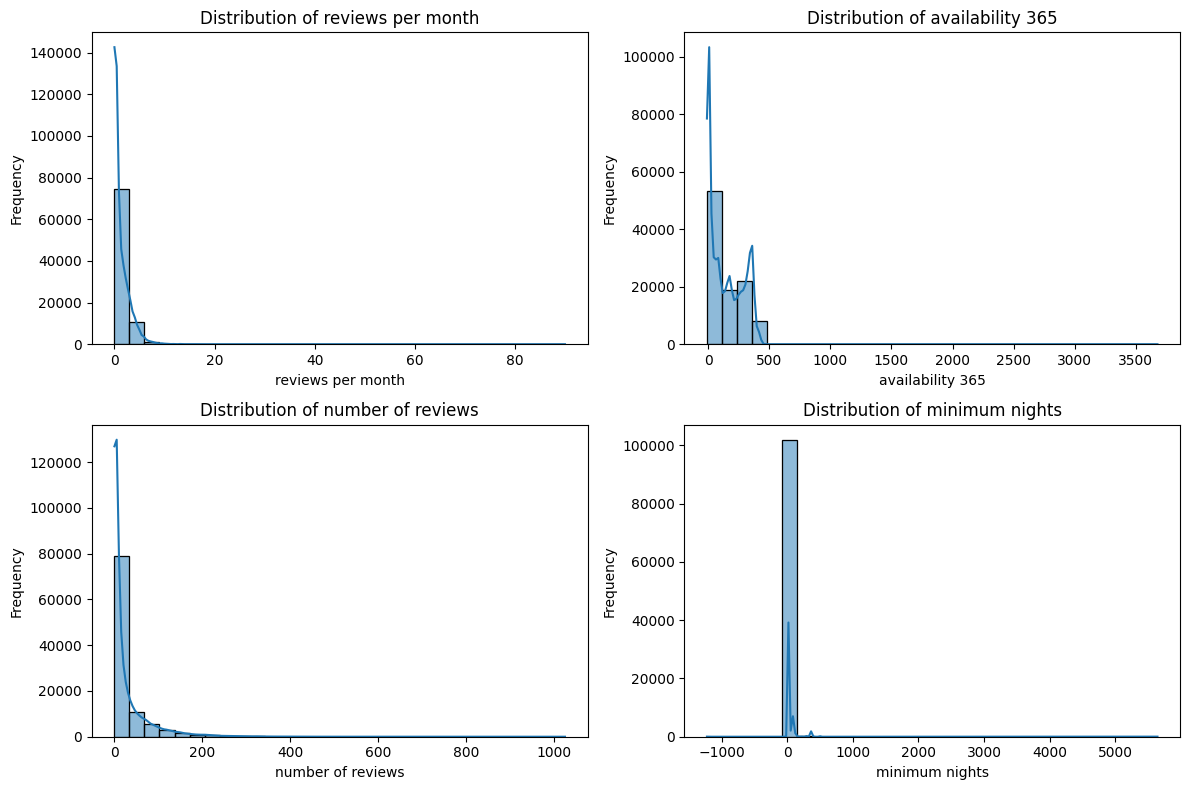

In [32]:
# Plot histograms to visualize data distribution
numerical_columns = ['reviews per month', 'availability 365',
                     'number of reviews', 'minimum nights']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of plots
    sns.histplot(airbnb_data[col], bins=30, kde=True)  # Histogram with KDE (Kernel Density Estimate)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## **Issue 1: The histograms above show the distribution of four key numerical columns before replacing missing values with the median.**

**Reviews Per Month:**

Right-skewed distribution (most values are close to zero).
A small number of listings receive frequent reviews per month, while the majority have low review counts.

**Availability (365 days per year):**

Right-skewed with a peak near 0 and 365 days.
Many listings are either unavailable most of the time or available all year round.

**Number of Reviews:**

Right-skewed distribution (many listings have very few reviews).
A few listings have significantly high review counts.

**Minimum Nights:**

Highly skewed with some extreme outliers.
Most listings have low minimum night requirements, but some require very long stays (potential data errors or special cases).

## **Implications Before Replacing Missing Values**

Since all distributions are skewed, the median is a better choice than the mean for replacing missing values, as it is less affected by extreme values (outliers).

In [33]:
# Fill missing numerical columns with the median
numerical_columns = ['reviews per month', 'availability 365',
                     'number of reviews', 'minimum nights']
for col in numerical_columns:
    airbnb_data[col].fillna(airbnb_data[col].median(), inplace=True)

In [34]:
#Result after replace missing value with median
print(airbnb_data.head())
print('\n--------------\n')
print(airbnb_data.tail())

        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United St

# **Issue 2: Unnecessary Data**

Based on the analysis objectives, the columns "license," "house rules," and "last review" are not necessary for this report.

Here are the reasons why the columns "license," "house rules," and "last review" are not necessary for this report:

**License:**

This column contains information about property licensing, which is irrelevant to the current analysis objectives (e.g., understanding pricing trends, review patterns, or room type performance).

Additionally, this column typically has a high number of missing values, making it less reliable for insights.

**House Rules:**

This column provides details about specific rules set by the host (e.g., no smoking, no pets). While relevant for individual guests, it does not contribute to broader trends or metrics like pricing, availability, or review performance.

**Last Review:**

While this column captures the date of the most recent review, it is less useful for analyzing review trends or overall performance. Metrics like the total number of reviews or reviews per month already provide sufficient insights for the report.

In [35]:
# Drop columns with negligible or irrelevant information
columns_to_drop = ['license', 'house_rules', 'last review']
airbnb_data.drop(columns=columns_to_drop, inplace=True)

In [36]:
# Convert 'price' and 'service fee' to numeric by removing currency symbols
airbnb_data['price'] = airbnb_data['price'].replace('[$,]', '', regex=True).astype(float)
airbnb_data['service fee'] = airbnb_data['service fee'].replace('[$,]', '', regex=True).astype(float)

In [37]:
# Drop rows with missing values in critical columns
airbnb_data.dropna(subset=['price', 'neighbourhood'], inplace=True)

In [38]:
#Print results after remove unnecessary column
print(airbnb_data.head())
print('\n--------------\n')
print(airbnb_data.tail())

        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ...        room type Construction year  \
0  40.64749 -73.97237  U

# **Issue 3: Inconsistent case size**

Data entries like "Manhattan", "manhattan", and "MANHATTAN" are treated as separate values in many analyses.
This can cause problems when grouping or aggregating data.

**Impact on Filtering:**

Queries like data[data['neighbourhood'] == 'Manhattan'] might miss rows where the value is "manhattan" or "MANHATTAN".

**Challenges in Matching:**

Inconsistent cases lead to incorrect joins or matches during data merging.


In [39]:
# Clean column names to be more readable and consistent
airbnb_data.columns = (
    airbnb_data.columns
    .str.strip()           # Remove leading and trailing whitespaces
    .str.title()           # Capitalize each word
)

# Display updated column names
airbnb_data

,Id,Name,Host Id,Host_Identity_Verified,Host Name,Neighbourhood Group,Neighbourhood,Lat,Long,Country,...,Room Type,Construction Year,Price,Service Fee,Minimum Nights,Number Of Reviews,Reviews Per Month,Review Rate Number,Calculated Host Listings Count,Availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,Private room,2020.0,966.0,193.0,10.0,9.0,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,Private room,2005.0,620.0,124.0,3.0,0.0,0.74,5.0,1.0,352.0
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,4.64,4.0,1.0,322.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,0.10,3.0,1.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,Private room,2003.0,844.0,169.0,1.0,0.0,0.74,3.0,1.0,227.0
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,Private room,2016.0,837.0,167.0,1.0,1.0,0.02,2.0,2.0,395.0
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,Private room,2009.0,988.0,198.0,3.0,0.0,0.74,5.0,1.0,342.0
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,Entire home/apt,2015.0,546.0,109.0,2.0,5.0,0.10,3.0,1.0,386.0


In [40]:
# Format the column to proper case
airbnb_data['Name'] = airbnb_data['Name'].str.title()

airbnb_data

,Id,Name,Host Id,Host_Identity_Verified,Host Name,Neighbourhood Group,Neighbourhood,Lat,Long,Country,...,Room Type,Construction Year,Price,Service Fee,Minimum Nights,Number Of Reviews,Reviews Per Month,Review Rate Number,Calculated Host Listings Count,Availability 365
0,1001254,Clean & Quiet Apt Home By The Park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,Private room,2020.0,966.0,193.0,10.0,9.0,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,0.38,4.0,2.0,228.0
2,1002403,The Village Of Harlem....New York !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,Private room,2005.0,620.0,124.0,3.0,0.0,0.74,5.0,1.0,352.0
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,4.64,4.0,1.0,322.0
4,1003689,Entire Apt: Spacious Studio/Loft By Central Park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,0.10,3.0,1.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare Room In Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,Private room,2003.0,844.0,169.0,1.0,0.0,0.74,3.0,1.0,227.0
102595,6092990,Best Location Near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,Private room,2016.0,837.0,167.0,1.0,1.0,0.02,2.0,2.0,395.0
102596,6093542,"Comfy, Bright Room In Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,Private room,2009.0,988.0,198.0,3.0,0.0,0.74,5.0,1.0,342.0
102597,6094094,Big Studio-One Stop From Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,Entire home/apt,2015.0,546.0,109.0,2.0,5.0,0.10,3.0,1.0,386.0


## **Issue 4: Error Spelling**

This data contains error spelling such as "Brookln", which is the correct spelling is "Brooklyn".

In [43]:
#Update all rows where the 'Neighbourhood Group' is 'brookln' to 'Brooklyn'
airbnb_data.loc[airbnb_data['Neighbourhood Group'] == 'brookln', 'Neighbourhood Group'] = 'Brooklyn'

# Update all rows where the 'Neighbourhood Group' is 'manhatan' to 'Manhattan'
airbnb_data.loc[airbnb_data['Neighbourhood Group'] == 'manhatan', 'Neighbourhood Group'] = 'Manhattan'

# **Visualization**

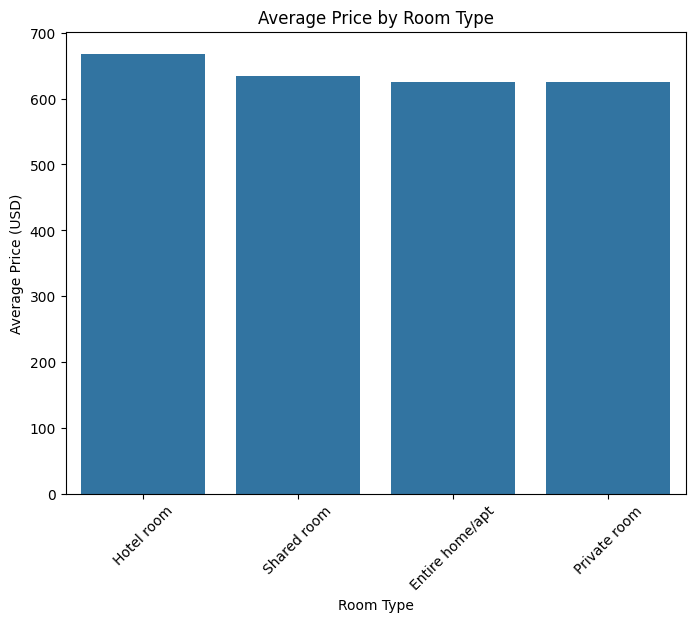

In [44]:
# Bar Plot: Average price by room type
plt.figure(figsize=(8, 6))
room_type_prices = airbnb_data.groupby('Room Type')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=room_type_prices.index, y=room_type_prices.values)
plt.title('Average Price by Room Type')
plt.ylabel('Average Price (USD)')
plt.xlabel('Room Type')
plt.xticks(rotation=45)
plt.show()


## **Bar Plot: Average Price for Each Room Type**

**Purpose:**

This plot highlights pricing patterns for different room types, providing insights into the cost differences between Entire Home/Apt, Private Room, Shared Room, and Hotel Room.

**Findings:**

Hotel Room: Typically has the highest average price,reflecting its premium value as guests book the entire property.

Private Room: More affordable, making it a popular choice for budget-conscious travelers.

Shared Room: Offers the good price, catering to travelers prioritizing cost over privacy.

Entire home/apt: Falls in the mid-range, potentially offering more professional services at a moderate price.

**Implications:**

Helps hosts determine competitive pricing based on room type.

Guides guests in understanding cost expectations for different accommodations.


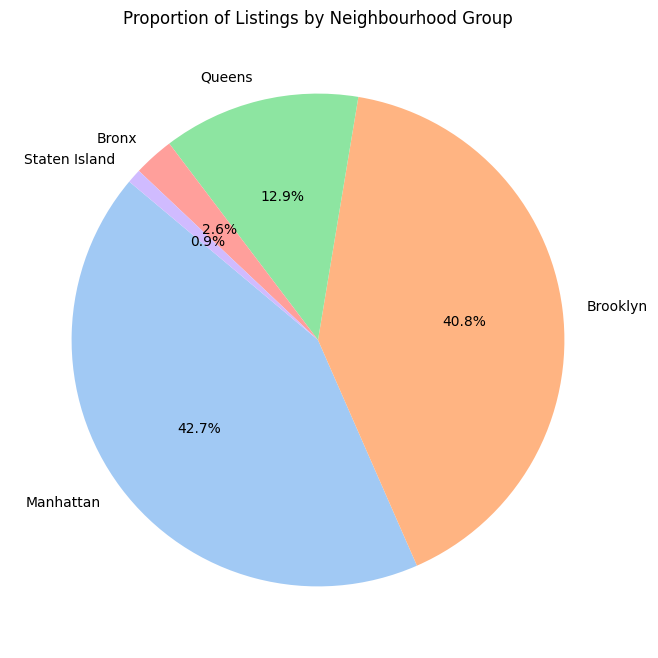

In [46]:
plt.figure(figsize=(8, 8))
neighbourhood_group_counts = airbnb_data['Neighbourhood Group'].value_counts()
neighbourhood_group_counts.plot.pie(autopct='%1.1f%%',
                                    startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Listings by Neighbourhood Group')
plt.ylabel('')  # Hide y-axis label
plt.show()


## **Pie Chart: Proportion of Listings by Neighborhood Group**

**Purpose:**

This chart visualizes the geographical concentration of listings, highlighting which areas dominate the market.

**Findings:**

Brooklyn and Manhattan often have the highest share of listings, reflecting their popularity among tourists.

Bronx and Staten Island have fewer listings, possibly indicating less tourist traffic or residential zoning.

Bronx contributes modestly to the total, likely due to its affordability and growing interest as a travel destination.

**Reference:** https://www.osc.ny.gov/reports/osdc/tourism-industry-new-york-city

**Implications:**

Helps Airbnb target neighborhood-specific strategies for growth or improvement.

Informs guests about popular and less-crowded areas to stay.

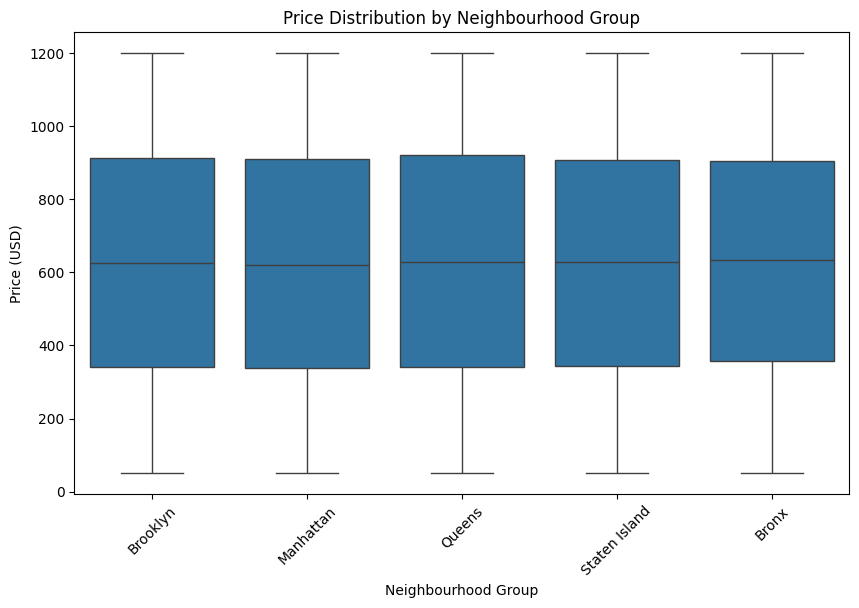

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Neighbourhood Group', y='Price', data=airbnb_data, showfliers=False)
plt.title('Price Distribution by Neighbourhood Group')
plt.ylabel('Price (USD)')
plt.xlabel('Neighbourhood Group')
plt.xticks(rotation=45)
plt.show()

## **Box Plot: Price Distribution Across Neighborhood Groups**

##**Key Observations:**
**Median Price is Similar Across Neighborhoods:**

The thick horizontal line inside each box represents the median price.
The median price appears consistent across Brooklyn, Manhattan, Queens, Staten Island, and Bronx.
This suggests that Airbnb pricing is relatively balanced across different neighborhood groups.

**Interquartile Range (IQR) is Consistent:**

The box represents the middle 50% of data (Q1 to Q3).
The height of the boxes is fairly uniform across neighborhoods, indicating a similar spread of prices.

**Wide Price Distribution:**

The whiskers (vertical lines extending from the boxes) indicate the minimum and maximum (excluding outliers).
Prices range from close to 0 USD to above 1200 USD in all neighborhoods.
This wide spread suggests significant variations in property types (budget rentals vs. luxury listings).

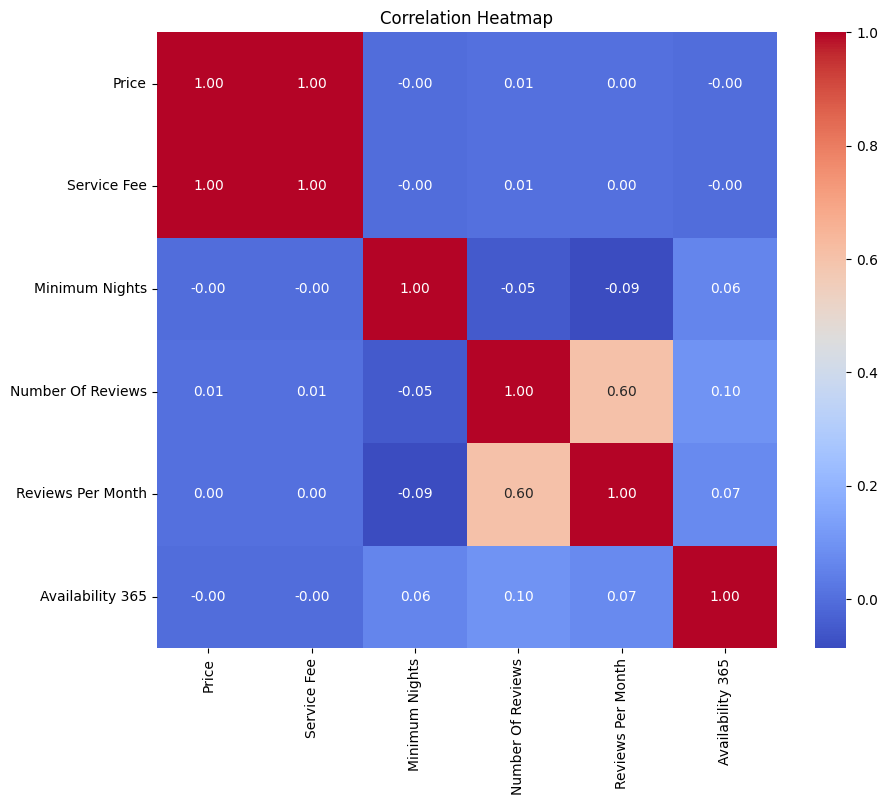

In [48]:
plt.figure(figsize=(10, 8))
correlation_matrix = airbnb_data[['Price', 'Service Fee', 'Minimum Nights', 'Number Of Reviews', 'Reviews Per Month', 'Availability 365']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap visualizes the relationships between numerical variables in the dataset. Each cell in the heatmap represents the correlation coefficient between two variables, ranging from -1 to 1:

1.00: Perfect positive correlation (as one variable increases, the other increases).

-1.00: Perfect negative correlation (as one variable increases, the other decreases).
0.00: No correlation (the variables are independent).

## **Key Observations from the Heatmap:**

**Price & Service Fee (Correlation: 1.00)**

A perfect positive correlation (1.00) means that service fees increase proportionally with price.This suggests that service fees are calculated as a fixed percentage of the price.

**Number of Reviews & Reviews Per Month (Correlation: 0.60)**

A strong positive correlation (0.60) suggests that listings with a high number of reviews tend to receive more frequent reviews per month.
This indicates that popular listings continue to attract more guests over time.

**Availability 365 & Number of Reviews (Correlation: 0.10)**

A weak positive correlation (0.10) suggests that listings with higher availability may get more reviews.
However, the low correlation indicates that availability alone is not a strong factor in determining review frequency.

**Minimum Nights & Other Variables (Near 0 Correlation)**

The column "minimum nights" has weak or near-zero correlations with all other variables.This means the number of minimum nights required for booking does not significantly impact price, service fee, reviews, or availability.

**Price & Other Factors**

Price has no significant correlation with availability, reviews, or minimum nights.
This suggests that factors beyond these numerical metrics (such as location, property type, or amenities) influence pricing.

**Explanation:**

Higher prices do not necessarily translate to more reviews or frequent bookings.

###**Implications:**

**Pricing Strategy:**

Hosts can set competitive service fees aligned with their listing prices since they are strongly correlated.

**Guest Engagement:**

Listings with more frequent reviews (reviews per month) often have a higher total number of reviews, signaling active guest engagement.

**Availability Optimization:**

While availability correlates weakly with reviews, hosts may explore making their properties more available to attract more reviews and visibility.

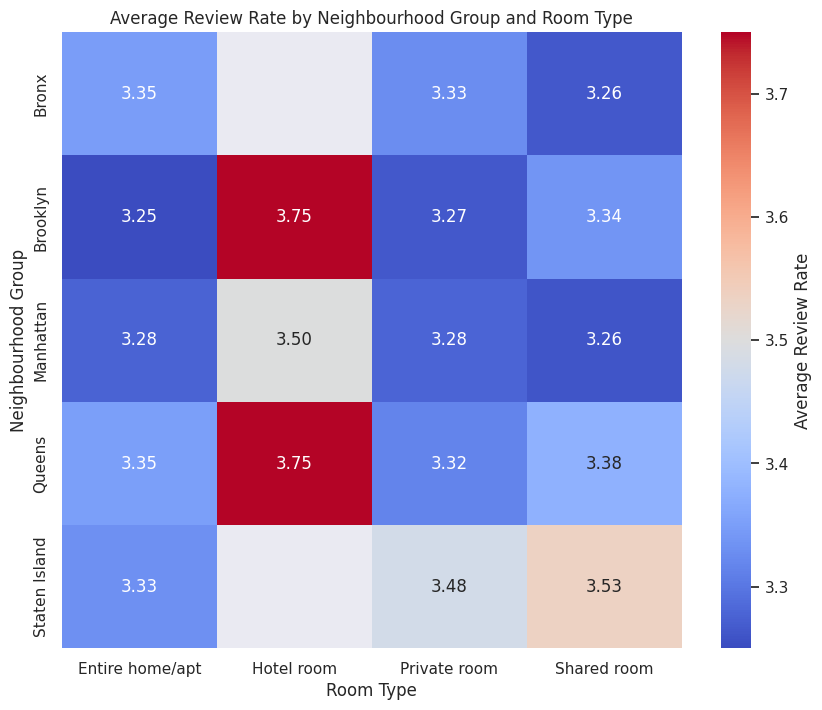

In [51]:
# Calculate the average review rate number for listings
average_review_rate = airbnb_data['Review Rate Number'].mean()

# Calculate the average review rate by neighbourhood group and room type
average_review_rate_by_group_type = airbnb_data.groupby(['Neighbourhood Group', 'Room Type'])['Review Rate Number'].mean().unstack()

# Display the overall average and the grouped averages
average_review_rate, average_review_rate_by_group_type

# Plotting the data as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(average_review_rate_by_group_type, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Average Review Rate'})
plt.title('Average Review Rate by Neighbourhood Group and Room Type')
plt.xlabel('Room Type')
plt.ylabel('Neighbourhood Group')
plt.show()

# **Observations:**

**Overall Trends:**

Average review rates generally range from 3.25 to 3.75 stars across all neighborhoods and room types.
Hotel Rooms have the highest review rates (e.g., 3.75 in Queens and Brooklyn), indicating guest satisfaction in this category.

**By Room Type:**

Entire Home/Apt: Consistent review rates across all neighborhoods, ranging from 3.25 to 3.35 stars. Slightly lower than other room types due to potentially higher pricing or fewer shared experiences.

Private Room: Ranges from 3.27 to 3.48 stars, performing well in Staten Island with a higher average (3.48).

Shared Room: Performs exceptionally well in Staten Island (3.53 stars) and Queens (3.38 stars), reflecting good value for budget travelers.

Hotel Room: The top-performing category overall, particularly in Queens and Brooklyn (3.75 stars).

**By Neighborhood Group:**

Brooklyn: Hotel rooms (3.75 stars) outperform other room types. Entire Home/Apt listings have the lowest review rate (3.25 stars).

Manhattan: Hotel rooms (3.50 stars) lead, while other room types hover around 3.26 to 3.28 stars.

Queens: Shared rooms (3.38 stars) and hotel rooms (3.75 stars) receive excellent reviews, making this a standout neighborhood group.

Staten Island: Shared rooms (3.53 stars) and private rooms (3.48 stars) excel, indicating high guest satisfaction in these categories.

Bronx: Consistently good review rates across all room types, ranging from 3.26 to 3.35 stars.

## **Insights and Implications:**

**Room Type Performance:**

Hotel rooms perform best overall, particularly in Brooklyn and Queens. These may offer professional services and consistent experiences, leading to high ratings.

Shared rooms in Staten Island and Queens are highly rated, indicating strong demand for affordable, budget-friendly options.

**Neighborhood Group Insights:**

Staten Island and Queens exhibit strong performance across most room types, suggesting these areas provide high value for guests.

Manhattan has slightly lower average ratings for non-hotel listings, possibly due to higher prices or unmet expectations.

**Actionable Recommendations:**

Hosts in Staten Island and Queens should focus on maintaining quality and pricing for shared and private rooms to capitalize on their popularity.

Entire home listings in Brooklyn and Manhattan may need improvement in guest experiences to increase review ratings.

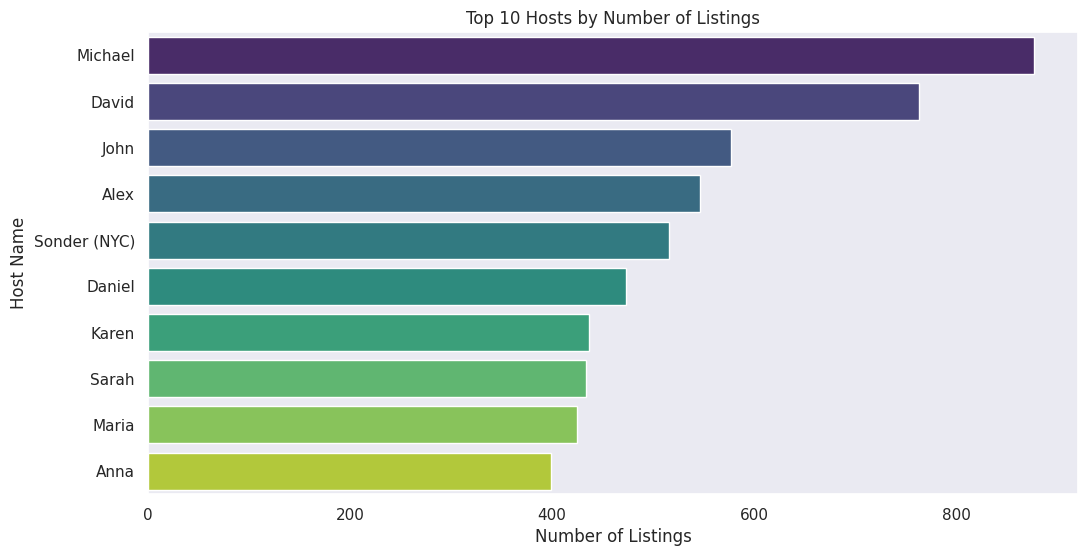

In [52]:
# Count the number of listings by host name
listings_by_host = airbnb_data['Host Name'].value_counts().head(10)  # Top 10 hosts by number of listings

# Plot the data as a bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=listings_by_host.values, y=listings_by_host.index, palette="viridis")
plt.title('Top 10 Hosts by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Host Name')
plt.show()


## **Observations:**

**Dominant Hosts:**

Michael is the top host with the highest number of listings (approximately 900), significantly outperforming other hosts.

David follows as the second most active host with listings close to 700.

**Other Active Hosts:**

Hosts like John, Alex, and Sonder (NYC) manage a substantial number of listings, ranging between 400 and 500.

The remaining hosts (Daniel, Karen, Sarah, Maria, and Anna) manage between 300 and 400 listings.

**Concentration:**

A few hosts dominate the market, which might suggest these are professional hosts or companies managing multiple properties.

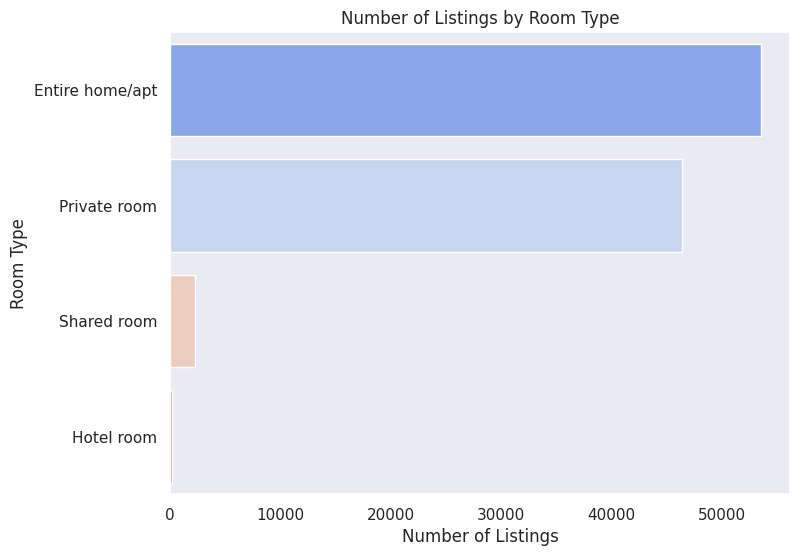

In [53]:
# Count the number of listings by room type
listings_by_room_type = airbnb_data['Room Type'].value_counts()

# Plot the data as a bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x=listings_by_room_type.values, y=listings_by_room_type.index, palette="coolwarm")
plt.title('Number of Listings by Room Type')
plt.xlabel('Number of Listings')
plt.ylabel('Room Type')
plt.show()


## **Observations:**

**Entire Home/Apt:**

This category dominates the dataset with the highest number of listings (close to 50,000).

These listings allow guests to book the entire property, making it a preferred choice for families, groups, or travelers seeking privacy.

**Private Room:**

The second most common room type, with approximately 30,000 listings.

This option caters to budget-conscious travelers or those looking for a mix of affordability and privacy.

**Shared Room:**

A much smaller share of listings compared to the other categories, with only a few thousand available.

This type caters to travelers prioritizing cost savings over privacy, often backpackers or solo travelers.

**Hotel Room:**

The least common category in the dataset, with very few listings.

This reflects Airbnb's original focus on unique accommodations rather than competing directly with hotels.

# **Conclusion**

This analysis provides the following actionable findings:

Review Rate Trends:

Staten Island's shared rooms and hotel rooms in Brooklyn and Queens consistently receive higher review rates, suggesting these categories align well with guest expectations.

Host Listings:

A small group of hosts dominates the listing market. Airbnb may consider further investigation into these superhosts for compliance and quality control.
Room Type Distribution: Entire homes/apartments dominate the market, but private and shared rooms show potential for attracting budget-conscious travelers.

These findings can help Airbnb focus on improving guest satisfaction, incentivizing top-performing hosts, and diversifying their room type offerings in key neighborhoods. Further analysis can explore pricing strategies, seasonal trends, and guest preferences.